# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [2]:
%run load_dataset.ipynb

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2001's data
Loading 2002's data
Finished loading


# Data Preprocessing

In [3]:
%run preprocess_for_SVM.ipynb
# includes wavelet denoising, normalization, PCA, LDA, SVD, etc.

In [4]:
print(X_all.shape, y_all.shape)

(27942, 3) (27942,)


# Group Data by Label and Normalize Data

In [5]:
print(label_list)

['sit', 'sleep', 'stand', 'walk']


In [6]:
# denoise the signal using wavelet transform
# wavelet_output = wavelet_smooth(X_all)
# X_w = np.array(wavelet_output)

In [7]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [8]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

plotting  sit


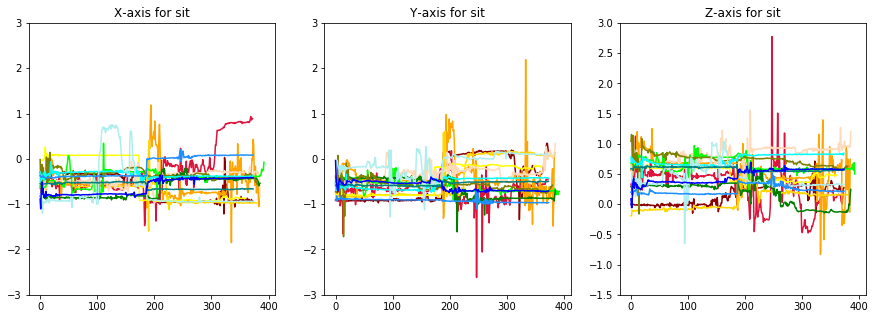

plotting  sleep


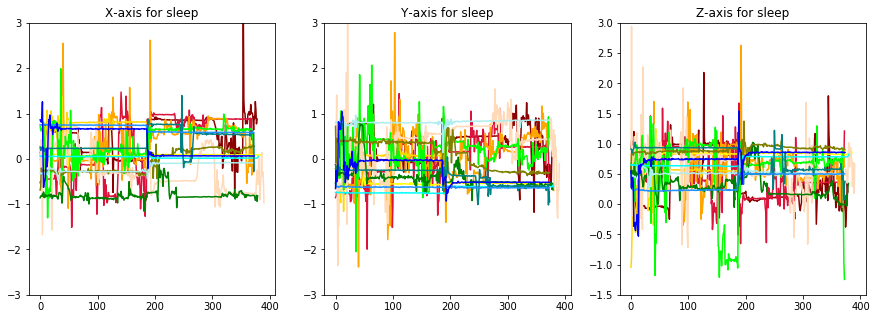

plotting  stand


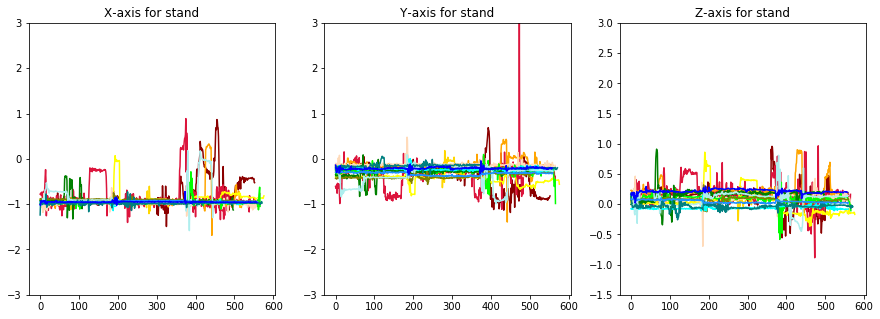

plotting  walk


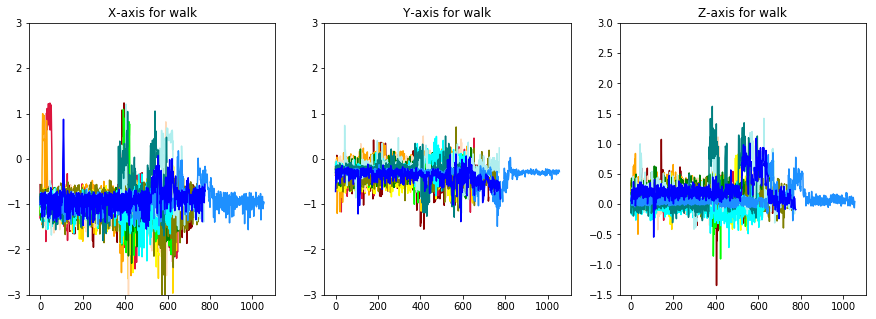

In [9]:
plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [10]:
roll, pitch, yaw = calc_rpy(X_all, subject_id, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape)

(27942, 3)


# Apply PCA and LDA

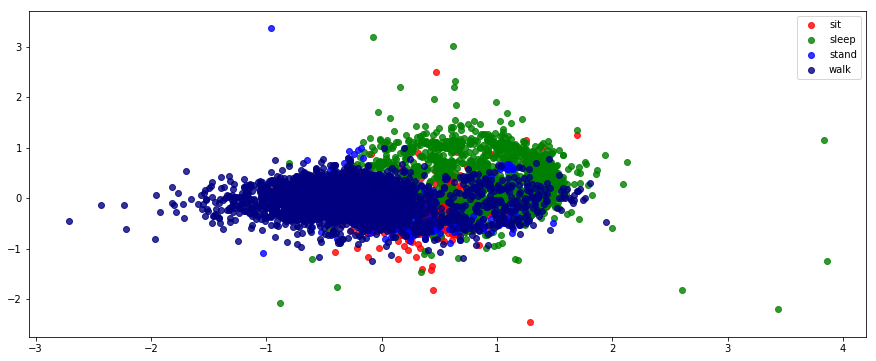

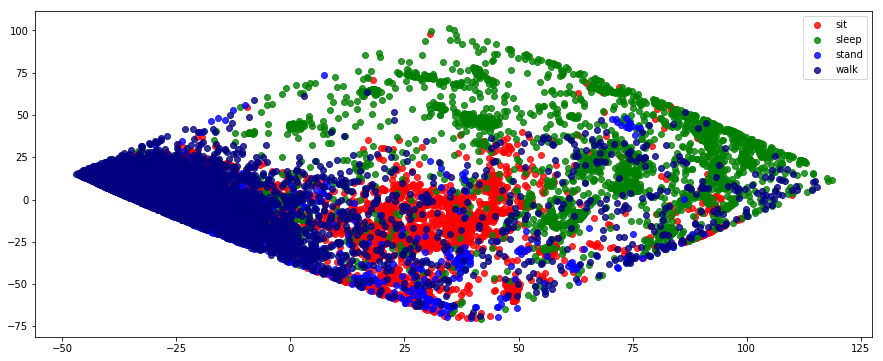

In [11]:
# apply PCA and LDA to X_norm and rpy
X_pca = apply_pca(X_all, y_all, label_list)
rpy_pca = apply_pca(rpy, y_all, label_list)

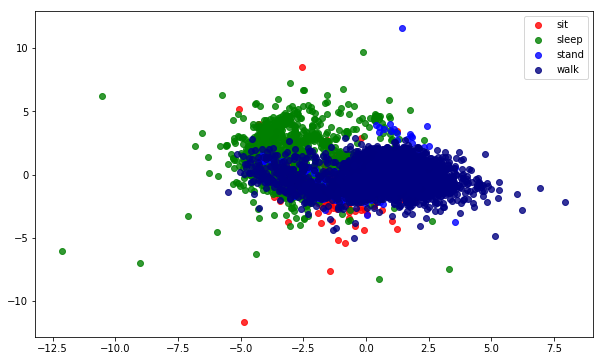

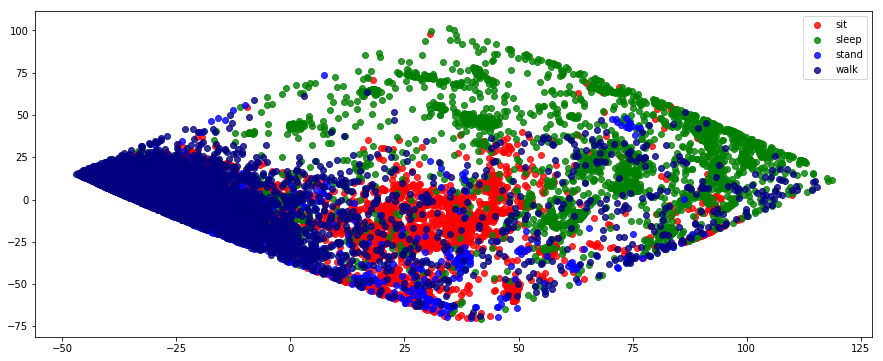

In [12]:
X_lda = apply_lda(X_all, y_all, label_list)
rpy_lda = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [13]:
# get label-separated X and y
X_svm, y_svm = prepare_pure_label(X_pca, y_all, subj_all, new_label_list)
y_svm = y_svm.reshape((y_svm.shape[0],))

In [14]:
print(X_svm.shape, y_svm.shape)

(24638, 180) (24638,)


# Reshape Data (Impure Label)

In [15]:
X_impure, y_impure = prepare_impure_label(X_pca, y_all)

In [16]:
print(X_impure.shape, y_impure.shape)

(27883, 180) (27883,)


# Split Train and Test Set

In [17]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.3, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(19518, 180)
(8365, 180)


# SVM

In [18]:
svm_model = svm_classifier(X_tr, y_tr)
print("Finished training")

Finished training


In [19]:
y_pred_svm = svm_model.predict(X_te)

## SVM Evaluation

In [20]:
%run eval_score.ipynb

In [21]:
LABELS = ['sit','sleep','stand','walk']

0.8372982665869695


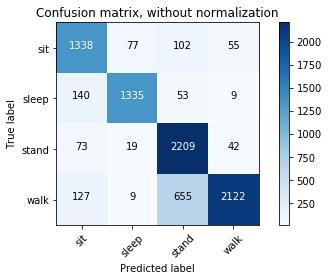

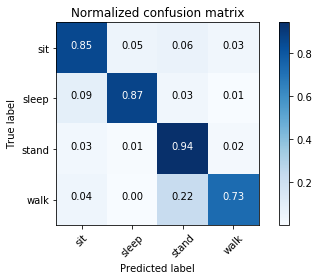

             precision    recall  f1-score   support

        sit       0.80      0.85      0.82      1572
      sleep       0.93      0.87      0.90      1537
      stand       0.73      0.94      0.82      2343
       walk       0.95      0.73      0.83      2913

avg / total       0.86      0.84      0.84      8365



In [22]:
acc = accuracy_score(y_te, y_pred_svm)
print(acc)

show_conf_matrix(y_te, y_pred_svm, LABELS)
show_clf_report(y_te, y_pred_svm, LABELS)

# K-NN

In [23]:
nn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [24]:
y_pred_nn = nn_model.predict(X_test)

## K-NN Evaluation

0.8291396103896104


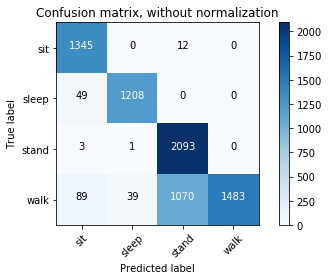

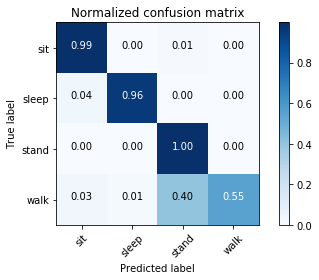

             precision    recall  f1-score   support

        sit       0.91      0.99      0.95      1357
      sleep       0.97      0.96      0.96      1257
      stand       0.66      1.00      0.79      2097
       walk       1.00      0.55      0.71      2681

avg / total       0.88      0.83      0.82      7392



In [25]:
acc = accuracy_score(y_test, y_pred_nn)
print(acc)

show_conf_matrix(y_test, y_pred_nn, LABELS)
show_clf_report(y_test, y_pred_nn, LABELS)

In [26]:
print(y_pred_svm.shape, X_te.shape)

(8365,) (8365, 180)


# Walk Algorithm

In [27]:
%run classifier_alg.ipynb

In [28]:
WALK_LABEL = 3

In [29]:
X_te_new = get_inverse_X(X_test)

In [ ]:
y_pred_walk = classify_walk(X_te_new, WALK_LABEL)

In [ ]:
y_pred_new = []

for i in range(len(y_pred_svm)):
    if(y_pred_svm[i]!=WALK_LABEL and y_pred_walk[i]==WALK_LABEL):
        y_pred_new.append(y_pred_walk[i])
        
    else:
        y_pred_new.append(y_pred_svm[i])

In [ ]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

In [27]:
# classify walking
walk = calc_walk(X_all)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

# walk_stairs_exact_p = get_exact_walk_stairs(y_all)
walk_exact_p = get_exact_walk(y_all)
    
walk_pred = binarize_walk_prd(walk_pred_p, y_all)
# walk_stairs_exact = binarize_walk_prd(walk_stairs_exact_p, y_all)
walk_exact = binarize_walk_prd(walk_exact_p, y_all)

In [77]:
print(X_all.shape)

(27949, 3)


## Walk Algorithm Evaluation

In [28]:
walk_lbl = ['NaN','walk']

0.9156320440802891


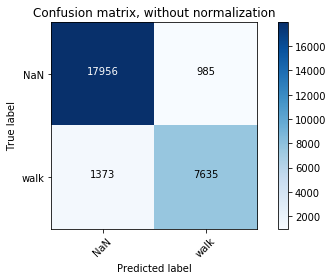

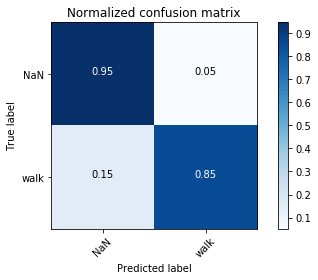

              precision    recall  f1-score   support

         NaN       0.93      0.95      0.94     18941
        walk       0.89      0.85      0.87      9008

   micro avg       0.92      0.92      0.92     27949
   macro avg       0.91      0.90      0.90     27949
weighted avg       0.92      0.92      0.92     27949



In [29]:
acc = accuracy_score(walk_exact, walk_pred)
print(acc)

show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [31]:
X_walk = [X_all[i] for i in range(len(walk_pred)) if walk_pred[i]==1]
X_non_walk = [X_all[i] for i in range(len(walk_pred)) if walk_pred[i]==0]

X_walk = np.array(X_walk)
X_non_walk = np.array(X_non_walk)

y_walk = [y_all[i] for i in range(len(walk_pred)) if walk_pred[i]==1]
y_non_walk = [y_all[i] for i in range(len(walk_pred)) if walk_pred[i]==0]

y_walk = np.array(y_walk)
y_non_walk = np.array(y_non_walk)

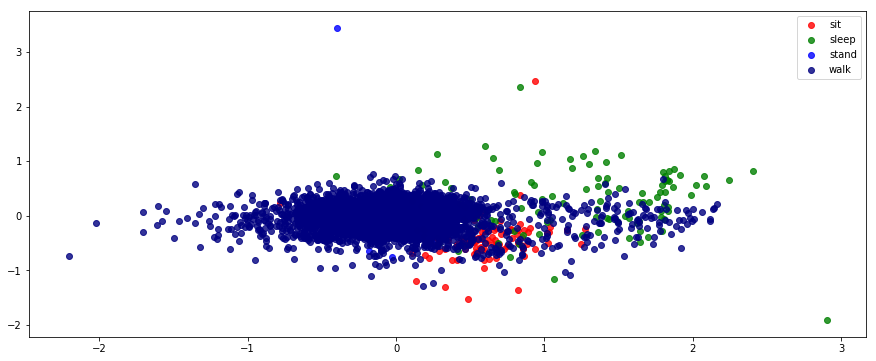

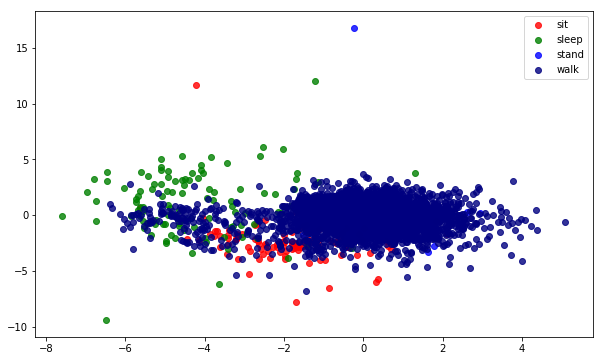

In [33]:
Xw_pca = apply_pca(X_walk, y_walk, label_list)
Xw_lda = apply_lda(X_walk, y_walk, label_list)

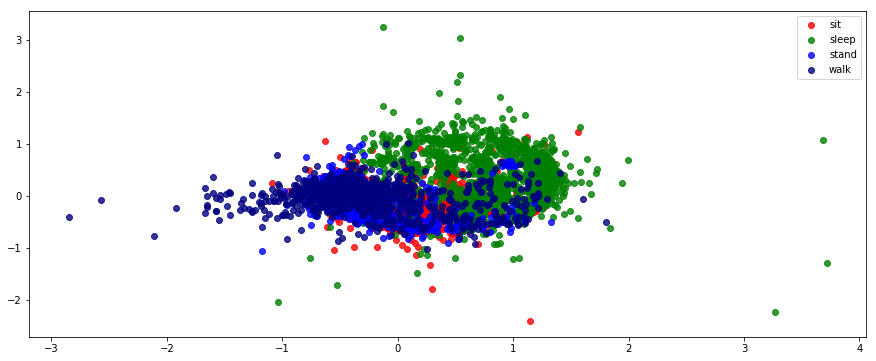

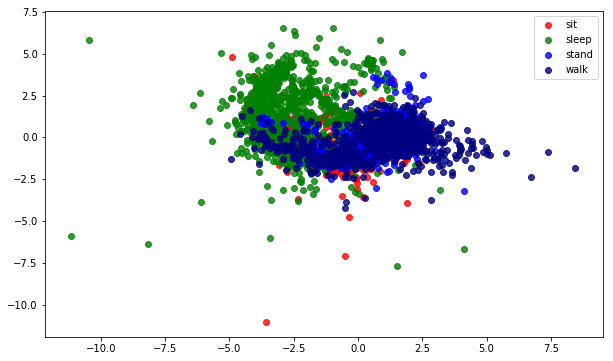

In [34]:
Xnw_pca = apply_pca(X_non_walk, y_non_walk, label_list)
Xnw_lda = apply_lda(X_non_walk, y_non_walk, label_list)

In [35]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw_lda, y_walk, test_size=0.3, random_state=42)

Xnw_train, Xnw_test, ynw_train, ynw_test = train_test_split(Xnw_lda, y_non_walk, test_size=0.3, random_state=42)

In [36]:
svm_walk = svm_classifier(Xw_train, yw_train)
print("Finish Training")

Finish Training


In [37]:
svm_non_walk = svm_classifier(Xnw_train, ynw_train)
print("Finish Training")

Finish Training


In [38]:
yw_pred = svm_walk.predict(Xw_test)
ynw_pred = svm_non_walk.predict(Xnw_test)

0.9667440061871616


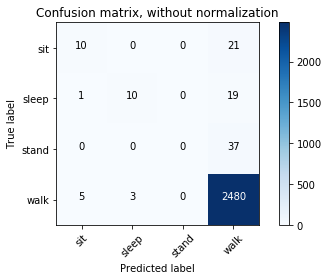

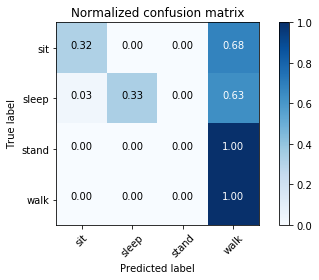

              precision    recall  f1-score   support

         sit       0.62      0.32      0.43        31
       sleep       0.77      0.33      0.47        30
       stand       0.00      0.00      0.00        37
        walk       0.97      1.00      0.98      2488

   micro avg       0.97      0.97      0.97      2586
   macro avg       0.59      0.41      0.47      2586
weighted avg       0.95      0.97      0.96      2586



/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
acc = accuracy_score(yw_test, yw_pred)
print(acc)

show_conf_matrix(yw_test, yw_pred, LABELS)
show_clf_report(yw_test, yw_pred, LABELS)

0.8691153647180548


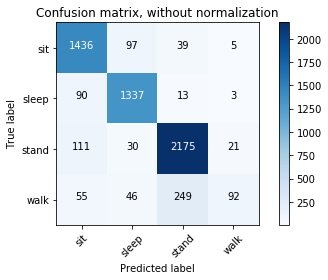

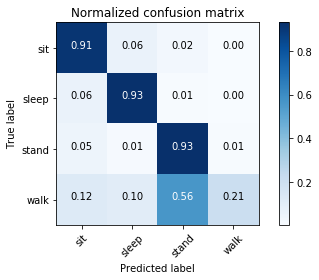

              precision    recall  f1-score   support

         sit       0.85      0.91      0.88      1577
       sleep       0.89      0.93      0.91      1443
       stand       0.88      0.93      0.90      2337
        walk       0.76      0.21      0.33       442

   micro avg       0.87      0.87      0.87      5799
   macro avg       0.84      0.74      0.75      5799
weighted avg       0.86      0.87      0.85      5799



In [40]:
acc = accuracy_score(ynw_test, ynw_pred)
print(acc)

show_conf_matrix(ynw_test, ynw_pred, LABELS)
show_clf_report(ynw_test, ynw_pred, LABELS)

# Test Model with Some Subject

In [41]:
test_subj = '1003'
filepath = 'DDC_Data/' + test_subj + '/' + test_subj + '-log_acc.csv'

df_test = pd.read_csv(filepath, header=None, names=['x','y','z','timestamp'])

In [42]:
ts_list = []
g = 9.8

for i in range(len(df_test)):
    X_i = [df_test.loc[i]['x']/g, df_test.loc[i]['y']/g, df_test.loc[i]['z']/g]
    ts_list.append(df_test.loc[i]['timestamp'])
    
    if(i==0):
        X_visua = X_i
    else:
        X_visua = np.vstack((X_visua, X_i))

ts_list = np.array(ts_list)

In [43]:
n_comp = 3

pca = PCA(n_components=n_comp)
pca = pca.fit(X_all)
X_vis_pca = pca.transform(X_visua)

In [44]:
X_vis_imp, ts_list_imp = prepare_impure_label(X_vis_pca, ts_list)

In [45]:
y_t_pred = svm_model.predict(X_vis_imp)

In [46]:
y_dict = {}
y_dict['timestamp'] = ts_list_imp
y_dict['y_pred'] = y_t_pred

df_y = pd.DataFrame(y_dict)

df_y['y_pred'].value_counts()

2    1319
3    1182
0    1106
1     863
Name: y_pred, dtype: int64

# Test SVM Model with Data from One Subject

In [47]:
timer_path = 'DDC_Data/' + test_subj + '/' + test_subj + '-iphone-history_amdtimer 6.csv'

cols = ['sid', 'timestamp', 'duration', 'label']
df_timer = pd.read_csv(timer_path, header=None, names=['sid','label','timestamp', 'duration'])
sid_list = np.array(list(df_timer['sid']))

tf = list(map(lambda x: x==int(test_subj), sid_list))
df_sid = df_timer[tf]
df_sid = df_sid.reset_index(drop=True)

# Group a Sequence into Periods by Labels

In [48]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

# Display Table

In [49]:
from prettytable import PrettyTable

In [50]:
labels_list = ['sit', 'sleep', 'stairs', 'stand', 'walk']
headers = ['start', 'end', 'label']

t = PrettyTable(headers)

for row in label_period:
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [51]:
print(t)

+-------------------------+-------------------------+--------+
|          start          |           end           | label  |
+-------------------------+-------------------------+--------+
| 2019-01-14 15:43:32.428 | 2019-01-14 15:46:12.937 | stairs |
| 2019-01-14 15:46:13.098 | 2019-01-14 15:46:25.638 | stairs |
| 2019-01-14 15:46:25.799 |  2019-01-14 15:46:26.12 |  sit   |
| 2019-01-14 15:46:26.281 | 2019-01-14 15:46:46.856 | stairs |
| 2019-01-14 15:46:47.017 | 2019-01-14 15:47:24.786 |  sit   |
| 2019-01-14 15:47:24.947 |  2019-01-14 15:48:06.74 | stairs |
| 2019-01-14 15:48:06.901 |  2019-01-14 15:48:13.49 |  sit   |
| 2019-01-14 15:48:13.651 | 2019-01-14 15:48:14.295 | sleep  |
| 2019-01-14 15:48:14.454 | 2019-01-14 15:48:14.454 |  sit   |
| 2019-01-14 15:48:14.616 | 2019-01-14 15:48:43.706 | sleep  |
| 2019-01-14 15:48:43.866 |  2019-01-14 15:48:46.6  | stairs |
| 2019-01-14 15:48:46.759 | 2019-01-14 15:48:46.759 |  sit   |
|  2019-01-14 15:48:46.92 | 2019-01-14 15:48:50.618 | s

In [52]:
# df_sid[cols]

# Predicted Duration

In [53]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        secs += calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Seconds', 'Percentage'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], total_secs[i], percent_secs[i]])

tb.add_row(['', '', ''])
tb.add_row(['total', round(np.sum(total_secs), 3), round(np.sum(percent_secs), 3)])

In [54]:
print(tb)

+--------+---------+------------+
| Label  | Seconds | Percentage |
+--------+---------+------------+
|  sit   |  92.727 |   15.975   |
| sleep  |  70.392 |   12.127   |
| stairs | 283.621 |   48.863   |
| stand  | 133.701 |   23.034   |
|        |         |            |
| total  | 580.441 |   99.999   |
+--------+---------+------------+


# Actual Duration

In [55]:
df_lb = df_sid.groupby('label')
old_labels_list = ['sit', 'sleep', 'downstairs', 'upstairs', 'stand', 'walk']

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(old_labels_list)):
    lb = old_labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'stairs'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])

total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Seconds', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, dura_dict[lb], round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', round(total_dura, 3), np.sum(percent_list)])

In [56]:
print(tabl)

+--------+---------+------------+
| Label  | Seconds | Percentage |
+--------+---------+------------+
|  sit   |   62.0  |   18.96    |
| sleep  |   60.0  |   18.349   |
| stairs |   55.0  |   16.82    |
| stand  |   90.0  |   27.523   |
|  walk  |   60.0  |   18.349   |
|        |         |            |
| total  |  327.0  |  100.001   |
+--------+---------+------------+


In [ ]:
print('Prediction', 'Actual')
print (tb , tabl)